In [1]:
%pip install pandas matplotlib seaborn numpy squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify as sq

In [3]:
#loading and reading CSV fiel using pandas
data = pd.read_csv('jobs_in_data.csv')
data.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
#shape of the data
data.shape

(9355, 12)

Descriptive stats about the fields

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [6]:
data.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


Data Visualization using charts

2023    7453
2022    1634
2021     197
2020      71
Name: work_year, dtype: int64


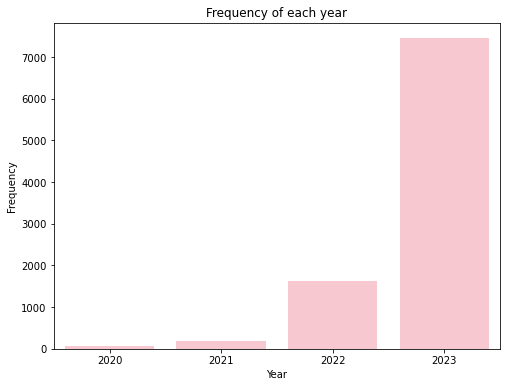

In [7]:
#get frequency of each year
year_frequency = data['work_year'].value_counts()
print(year_frequency)

#plot chart
plt.figure(figsize=(8,6))
sns.barplot(x = year_frequency.index, y = year_frequency, color='pink')
plt.title('Frequency of each year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

   work_year           mean
0       2020  105878.859155
1       2021  106483.644670
2       2022  135467.501836
3       2023  155132.591708


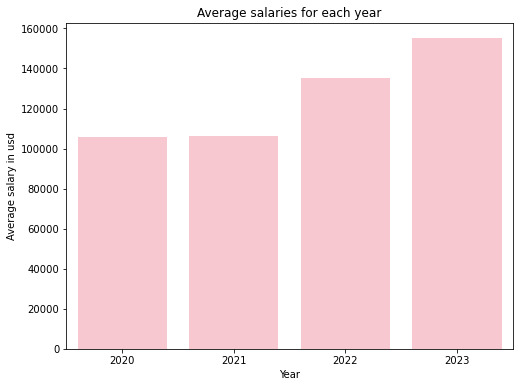

In [8]:
#get average salaries for each year
year_salaries = data.groupby('work_year')['salary_in_usd'].mean().reset_index(name='mean')
print(year_salaries)

#plot chart
plt.figure(figsize=(8,6))
sns.barplot(data=year_salaries, x='work_year', y='mean', color='pink')
plt.title('Average salaries for each year')
plt.xlabel('Year')
plt.ylabel('Average salary in usd')
plt.show()


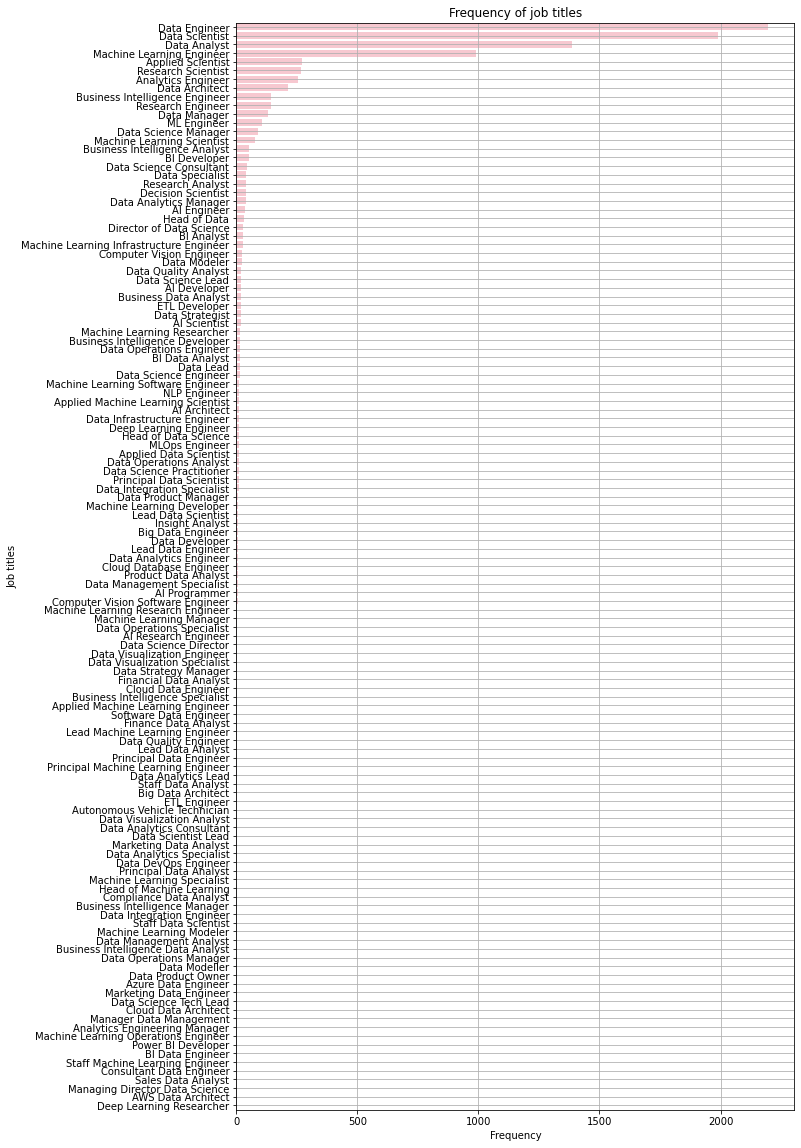

In [9]:
#get frequency of job titles
job_titles_frequency = data['job_title'].value_counts()

plt.figure(figsize=(10,20))
sns.barplot(y=job_titles_frequency.index, x=job_titles_frequency, color='pink')
plt.title('Frequency of job titles')
plt.ylabel('Job titles')
plt.xlabel('Frequency')
plt.grid()
plt.show()

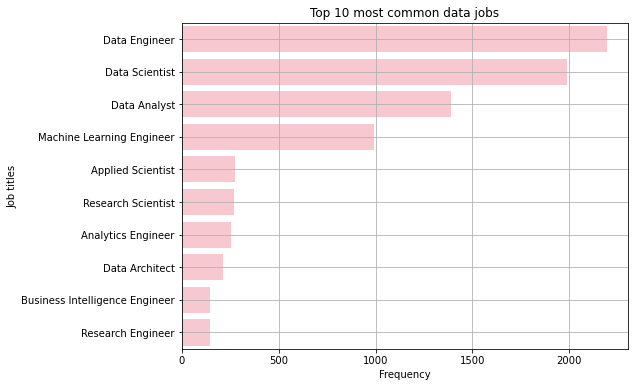

In [10]:
#get top 10 most common data jobs
job_titles_frequency= job_titles_frequency.nlargest(10)

#plot graph
plt.figure(figsize=(8,6))
#plt.axis("off")
#sq.plot(job_titles_frequency, label=job_titles_frequency.index, alpha=0.5, pad=1, text_kwargs={'fontsize':10}, color=sns.color_palette("tab20",len(job_titles_frequency)))

sns.barplot(y=job_titles_frequency.index, x=job_titles_frequency, color='pink')
plt.title('Top 10 most common data jobs')
plt.ylabel('Job titles')
plt.xlabel('Frequency')
plt.grid()
plt.show()

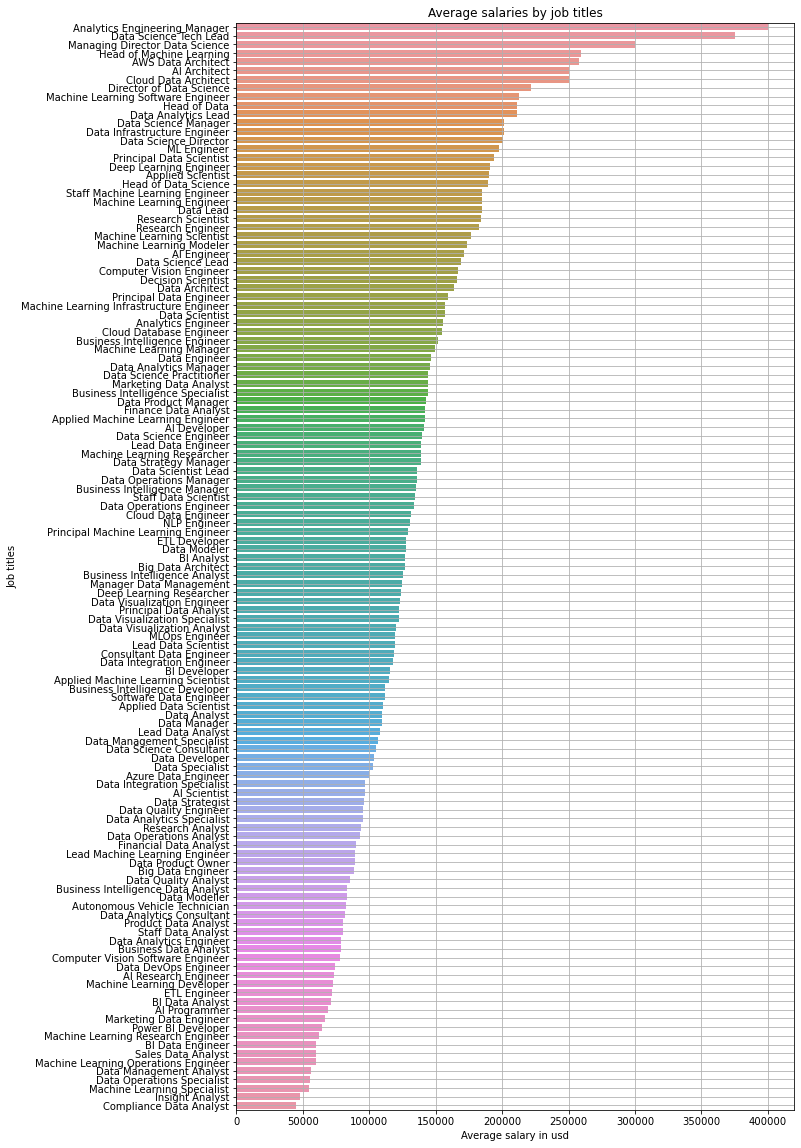

In [11]:
#visualize average salaries by job titles
titles_salaries = data.groupby(['job_title'])['salary_in_usd'].mean().reset_index(name='mean')
titles_salaries=titles_salaries.sort_values(by=['mean'], ascending=False)
#plot chart
plt.figure(figsize=(10,20))
sns.barplot(data=titles_salaries, y='job_title', x='mean')
plt.title('Average salaries by job titles')
plt.ylabel('Job titles')
plt.xlabel('Average salary in usd')
plt.grid()
plt.show()

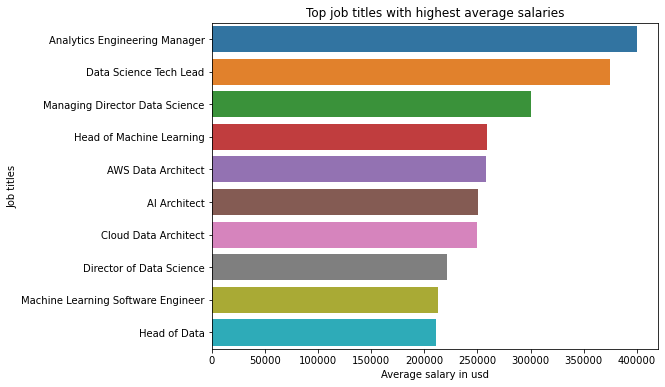

In [12]:
#visualize top job_titles with the highest average salaries
titles_salariesz_new = titles_salaries.nlargest(10,'mean')

#plot chart
plt.figure(figsize=(8,6))
sns.barplot(data=titles_salariesz_new, y='job_title', x='mean')
plt.title('Top job titles with highest average salaries')
plt.ylabel('Job titles')
plt.xlabel('Average salary in usd')
plt.show()

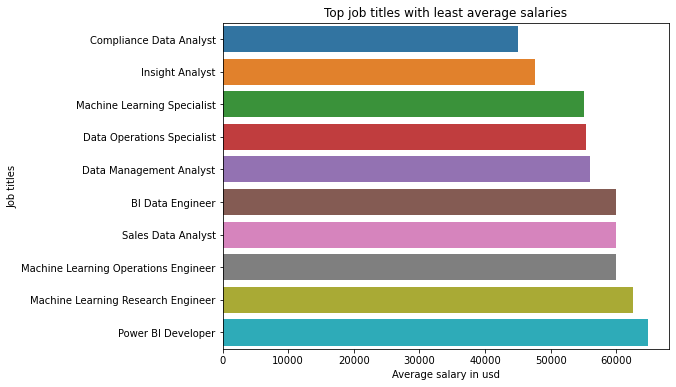

In [13]:
#visualize top job_titles with the least average salaries
titles_salariesz_new2 = titles_salaries.nsmallest(10,'mean')

#plot chart
plt.figure(figsize=(8,6))
sns.barplot(data=titles_salariesz_new2, y='job_title', x='mean')
plt.title('Top job titles with least average salaries')
plt.ylabel('Job titles')
plt.xlabel('Average salary in usd')
plt.show()

In [14]:
#Visualize Average Salaries  for the most common job titles

#most common job titles
titles_salaries.set_index("job_title", inplace=True)
salary_common_job = titles_salaries.loc[job_titles_frequency.index]
salary_common_job = salary_common_job.sort_values(by=['mean'], ascending=False)

#plot chart
plt.figure(figsize=(8,6))
sns.barplot(data=salary_common_job, y='job_title', x='mean')
plt.title('Average salaries for most common job titles')
plt.ylabel('Job titles')
plt.xlabel('Average salary in usd')
plt.show()

ValueError: Could not interpret input 'job_title'

<Figure size 576x432 with 0 Axes>

In [ ]:
#visualize distribution of job categories
#plt.figure(figsize=(8,6))
sns.displot(data=data, y="job_category")
plt.title('Distribution of job categories')
plt.show()

In [ ]:
#Average salaries by job category
salary_category = data.groupby('job_category')['salary_in_usd'].mean().reset_index(name='mean')
sns.barplot(data=salary_category, x='mean', y='job_category')
plt.title('Average salaries for each job category')
plt.xlabel('Average salary in usd')
plt.ylabel('Job category')
plt.show()

In [ ]:
#visualize average salary in usd based on currency
salary_currency = data.groupby('salary_currency')['salary_in_usd'].mean().reset_index(name='mean')
#sns.barplot(data=salary_currency, x='mean', y='salary_currency')
plt.figure(figsize=(10,8))
plt.axis("off")
sq.plot(salary_currency['mean'], label=salary_currency['salary_currency'], value=salary_currency['mean'].astype('int64'), alpha=0.5, pad=2, text_kwargs={'fontsize':10}, color=sns.color_palette("tab20",len(job_titles_frequency)))


plt.title('Average salaries in usd based on currency')
#plt.xlabel('Average salary in usd')
#plt.ylabel('Currency')
plt.show()

In [ ]:
#visualize average salary based on employee residence and company location
plt.figure(figsize=(15,15))
residence_location = data.groupby(['employee_residence'])['salary_in_usd'].mean().reset_index(name='mean')
residence_location = residence_location.sort_values(by=['mean'], ascending=False)

sns.barplot(data=residence_location, y='employee_residence', x='mean', errorbar=None)
plt.title('Average salaries based on employee residence and company location')
plt.xlabel('Average salary in dollars')
plt.ylabel('Employee residence')
plt.show()

In [ ]:
#Average salaries for each year in terms of experience level
plt.figure(figsize=(10,8))
year_salaries_experience = data.groupby(['work_year','job_category', 'experience_level'])['salary_in_usd'].mean().reset_index(name='mean')

sns.barplot(data=year_salaries_experience, x='work_year', y='mean', errorbar=None, hue='experience_level')
plt.title('Average salaries for each year in terms of experience level')
plt.xlabel('Year')
plt.ylabel('Average salary in usd')
plt.show()